For this project, we will analyze the "Home Equity Line of Credit" dataset with the ultimate goal of building a model which will predict which customers will pay back their loans or will not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #For specifying axes ticks
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages

<Figure size 600x300 with 0 Axes>

In [3]:
pwd

'C:\\Users\\19713\\Desktop\\Springboard'

In [4]:
df = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\heloc_dataset_v1 (1).csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [5]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [6]:
df.shape

(10459, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [8]:
df.isna().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [9]:
keys = []
for i in df.columns:
    keys.append(i)
keys.remove('RiskPerformance')    
keys

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance']

In [10]:
values = ['consolidated indicator of risk markers (equivalent of polish BIK’s rate)',
         'number of months that have elapsed since first trade',
         'number of months that have elapsed since last opened trade',
         'average months in file',
         'number of satisfactory trades',
         'number of trades which are more than 60 past due',
         'number of trades which are more than 90 past due',
         'percent of trades, that were not delinquent',
         'number of months that have elapsed since last delinquent trade',
         'the longest delinquency period in last 12 months',
         'the longest delinquency period',
         'total number of trades',
         'number of trades opened in last 12 months',
         'percent of installments trades',
         'months since last inquiry (excluding last 7 days)',
         'number of inquiries in last 6 months',
         'number of inquiries in last 6 months (excluding last 7 days)',
         'revolving balance divided by credit limit',
         'installment balance divided by original loan amount',
         'number of revolving trades with balance',
         'number of installment trades with balance',
         'number of trades with high utilization ratio (credit utilization ratio - the amount of a credit card balance compared to the credit limit)',
         'percent of trades with balance']

Below we have a table describing the features/predictors from the dataset.

In [11]:
# table of feature and its description
key_value_pairs = zip(keys, values)
my_dict = dict(key_value_pairs)
headers = ['Feature', 'Description']

print(f'{headers[0]: <45}{headers[1]: <35}')
for key, value in my_dict.items():
    print(f'{key: <45}{value: <35}')

Feature                                      Description                        
ExternalRiskEstimate                         consolidated indicator of risk markers (equivalent of polish BIK’s rate)
MSinceOldestTradeOpen                        number of months that have elapsed since first trade
MSinceMostRecentTradeOpen                    number of months that have elapsed since last opened trade
AverageMInFile                               average months in file             
NumSatisfactoryTrades                        number of satisfactory trades      
NumTrades60Ever2DerogPubRec                  number of trades which are more than 60 past due
NumTrades90Ever2DerogPubRec                  number of trades which are more than 90 past due
PercentTradesNeverDelq                       percent of trades, that were not delinquent
MSinceMostRecentDelq                         number of months that have elapsed since last delinquent trade
MaxDelq2PublicRecLast12M                     the lon

In [12]:
my_dict

{'ExternalRiskEstimate': 'consolidated indicator of risk markers (equivalent of polish BIK’s rate)',
 'MSinceOldestTradeOpen': 'number of months that have elapsed since first trade',
 'MSinceMostRecentTradeOpen': 'number of months that have elapsed since last opened trade',
 'AverageMInFile': 'average months in file',
 'NumSatisfactoryTrades': 'number of satisfactory trades',
 'NumTrades60Ever2DerogPubRec': 'number of trades which are more than 60 past due',
 'NumTrades90Ever2DerogPubRec': 'number of trades which are more than 90 past due',
 'PercentTradesNeverDelq': 'percent of trades, that were not delinquent',
 'MSinceMostRecentDelq': 'number of months that have elapsed since last delinquent trade',
 'MaxDelq2PublicRecLast12M': 'the longest delinquency period in last 12 months',
 'MaxDelqEver': 'the longest delinquency period',
 'NumTotalTrades': 'total number of trades',
 'NumTradesOpeninLast12M': 'number of trades opened in last 12 months',
 'PercentInstallTrades': 'percent of ins

In [13]:
# converting 'RiskPeformance' column with numerical values
df_num = df.copy()
risk_performance_num = {"Bad": 0, "Good": 1}
df_num['RiskPerformance'].replace(risk_performance_num, inplace = True)
df_num

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,0,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [14]:
columns_2 = df_num.columns.drop('RiskPerformance')
keys = []
values = []
for i in columns_2:
    keys.append(i)

In [15]:
for i in columns_2:
    x = np.arange(min(df[i])-1, max(df[i]) + 3, 3)
    values.append(x)
values

[array([-10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17,  20,  23,  26,
         29,  32,  35,  38,  41,  44,  47,  50,  53,  56,  59,  62,  65,
         68,  71,  74,  77,  80,  83,  86,  89,  92,  95]),
 array([-10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17,  20,  23,  26,
         29,  32,  35,  38,  41,  44,  47,  50,  53,  56,  59,  62,  65,
         68,  71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101, 104,
        107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143,
        146, 149, 152, 155, 158, 161, 164, 167, 170, 173, 176, 179, 182,
        185, 188, 191, 194, 197, 200, 203, 206, 209, 212, 215, 218, 221,
        224, 227, 230, 233, 236, 239, 242, 245, 248, 251, 254, 257, 260,
        263, 266, 269, 272, 275, 278, 281, 284, 287, 290, 293, 296, 299,
        302, 305, 308, 311, 314, 317, 320, 323, 326, 329, 332, 335, 338,
        341, 344, 347, 350, 353, 356, 359, 362, 365, 368, 371, 374, 377,
        380, 383, 386, 389, 392, 395, 398, 401, 404, 407, 410, 4

In [16]:
cut_bins = dict(zip(keys, values))

In [17]:
df_num.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [18]:
df_num['ExternalRiskEstimate'] = pd.cut(df_num['ExternalRiskEstimate'], bins = values[0])    
df_num['MSinceOldestTradeOpen'] = pd.cut(df_num['MSinceOldestTradeOpen'], bins = values[1])
df_num['MSinceMostRecentTradeOpen'] = pd.cut(df_num['MSinceMostRecentTradeOpen'], bins = values[2])
df_num['AverageMInFile'] = pd.cut(df_num['AverageMInFile'], bins = values[3])
df_num['NumSatisfactoryTrades'] = pd.cut(df_num['NumSatisfactoryTrades'], bins = values[4])
df_num['NumTrades60Ever2DerogPubRec'] = pd.cut(df_num['NumTrades60Ever2DerogPubRec'], bins = values[5])
df_num['NumTrades90Ever2DerogPubRec'] = pd.cut(df_num['NumTrades90Ever2DerogPubRec'], bins = values[6])
df_num['PercentTradesNeverDelq'] = pd.cut(df_num['PercentTradesNeverDelq'], bins = values[7])
df_num['MSinceMostRecentDelq'] = pd.cut(df_num['MSinceMostRecentDelq'], bins = values[8])
df_num['MaxDelq2PublicRecLast12M'] = pd.cut(df_num['MaxDelq2PublicRecLast12M'], bins = values[9])
df_num['MaxDelqEver'] = pd.cut(df_num['MaxDelqEver'], bins = values[10])
df_num['NumTotalTrades'] = pd.cut(df_num['NumTotalTrades'], bins = values[11])
df_num['NumTradesOpeninLast12M'] = pd.cut(df_num['NumTradesOpeninLast12M'], bins = values[12])
df_num['PercentInstallTrades'] = pd.cut(df_num['PercentInstallTrades'], bins = values[13])
df_num['MSinceMostRecentInqexcl7days'] = pd.cut(df_num['MSinceMostRecentInqexcl7days'], bins = values[14])
df_num['NumInqLast6M'] = pd.cut(df_num['NumInqLast6M'], bins = values[15])
df_num['NumInqLast6Mexcl7days'] = pd.cut(df_num['NumInqLast6Mexcl7days'], bins = values[16])
df_num['NetFractionRevolvingBurden'] = pd.cut(df_num['NetFractionRevolvingBurden'], bins = values[17])
df_num['NetFractionInstallBurden'] = pd.cut(df_num['NetFractionInstallBurden'], bins = values[18])
df_num['NumRevolvingTradesWBalance'] = pd.cut(df_num['NumRevolvingTradesWBalance'], bins = values[19])
df_num['NumInstallTradesWBalance'] = pd.cut(df_num['NumInstallTradesWBalance'], bins = values[20])
df_num['NumBank2NatlTradesWHighUtilization'] = pd.cut(df_num['NumBank2NatlTradesWHighUtilization'], bins = values[21])
df_num['PercentTradesWBalance'] = pd.cut(df_num['PercentTradesWBalance'], bins = values[22])

In [19]:
# to verify that every cell was placed into a bin
df_num.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [22]:
df_num

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,"(53, 56]","(143, 146]","(2, 5]","(83, 86]","(17, 20]","(2, 5]","(-1, 2]","(80, 83]","(-1, 2]",...,"(41, 44]","(-1, 2]","(-1, 2]","(-1, 2]","(32, 35]","(-10, -7]","(5, 8]","(-1, 2]","(-1, 2]","(68, 71]"
1,0,"(59, 62]","(56, 59]","(14, 17]","(38, 41]","(-1, 2]","(2, 5]","(2, 5]","(98, 101]","(-10, -7]",...,"(65, 68]","(-1, 2]","(-1, 2]","(-1, 2]","(-1, 2]","(-10, -7]","(-1, 2]","(-10, -7]","(-10, -7]","(-1, 2]"
2,0,"(65, 68]","(65, 68]","(2, 5]","(23, 26]","(8, 11]","(-1, 2]","(-1, 2]","(98, 101]","(-10, -7]",...,"(41, 44]","(-1, 2]","(2, 5]","(2, 5]","(50, 53]","(65, 68]","(2, 5]","(-1, 2]","(-1, 2]","(83, 86]"
3,0,"(65, 68]","(167, 170]","(-1, 2]","(71, 74]","(26, 29]","(-1, 2]","(-1, 2]","(92, 95]","(74, 77]",...,"(56, 59]","(-1, 2]","(2, 5]","(2, 5]","(71, 74]","(80, 83]","(5, 8]","(2, 5]","(2, 5]","(89, 92]"
4,0,"(80, 83]","(332, 335]","(26, 29]","(131, 134]","(11, 14]","(-1, 2]","(-1, 2]","(98, 101]","(-10, -7]",...,"(23, 26]","(-1, 2]","(-1, 2]","(-1, 2]","(50, 53]","(86, 89]","(2, 5]","(-1, 2]","(-1, 2]","(77, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1,"(71, 74]","(128, 131]","(2, 5]","(56, 59]","(20, 23]","(-1, 2]","(-1, 2]","(92, 95]","(77, 80]",...,"(17, 20]","(5, 8]","(-1, 2]","(-1, 2]","(23, 26]","(-10, -7]","(2, 5]","(-1, 2]","(-1, 2]","(98, 101]"
10455,0,"(62, 65]","(146, 149]","(38, 41]","(65, 68]","(8, 11]","(-1, 2]","(-1, 2]","(89, 92]","(26, 29]",...,"(41, 44]","(-1, 2]","(-1, 2]","(-1, 2]","(83, 86]","(50, 53]","(-1, 2]","(-1, 2]","(-1, 2]","(77, 80]"
10456,0,"(71, 74]","(128, 131]","(5, 8]","(62, 65]","(17, 20]","(-1, 2]","(-1, 2]","(98, 101]","(-10, -7]",...,"(32, 35]","(2, 5]","(2, 5]","(2, 5]","(5, 8]","(-10, -7]","(2, 5]","(-10, -7]","(-1, 2]","(53, 56]"
10457,0,"(71, 74]","(233, 236]","(11, 14]","(110, 113]","(41, 44]","(-1, 2]","(-1, 2]","(95, 98]","(32, 35]",...,"(17, 20]","(5, 8]","(-1, 2]","(-1, 2]","(17, 20]","(-10, -7]","(2, 5]","(-1, 2]","(-1, 2]","(35, 38]"


In [39]:
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


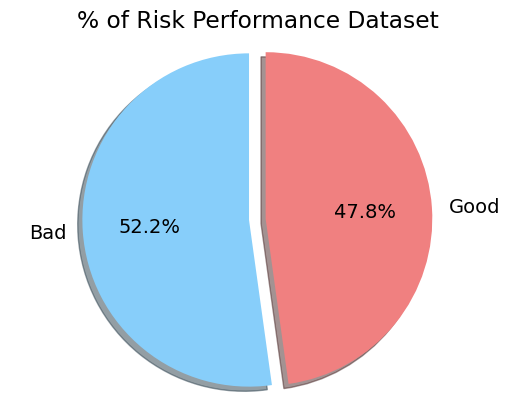

In [24]:
# pie graph of risk performance
sizes = df['RiskPerformance'].value_counts(sort = True)
labels = ['Bad', 'Good']
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) #explode Churns

fig = plt.figure()
plt.pie(sizes, 
       labels = labels,
       colors = colors,
       explode = explode,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 90)
plt.axis('equal')
plt.title('% of Risk Performance Dataset')
plt.show()
fig.savefig('Risk_performance_pi-chart.pdf')

From the above pie chart we see that there is a slight majority of bad customers in comparison to good customers.

In [25]:
Y = df['RiskPerformance']
X = df.drop('RiskPerformance', axis = 1)

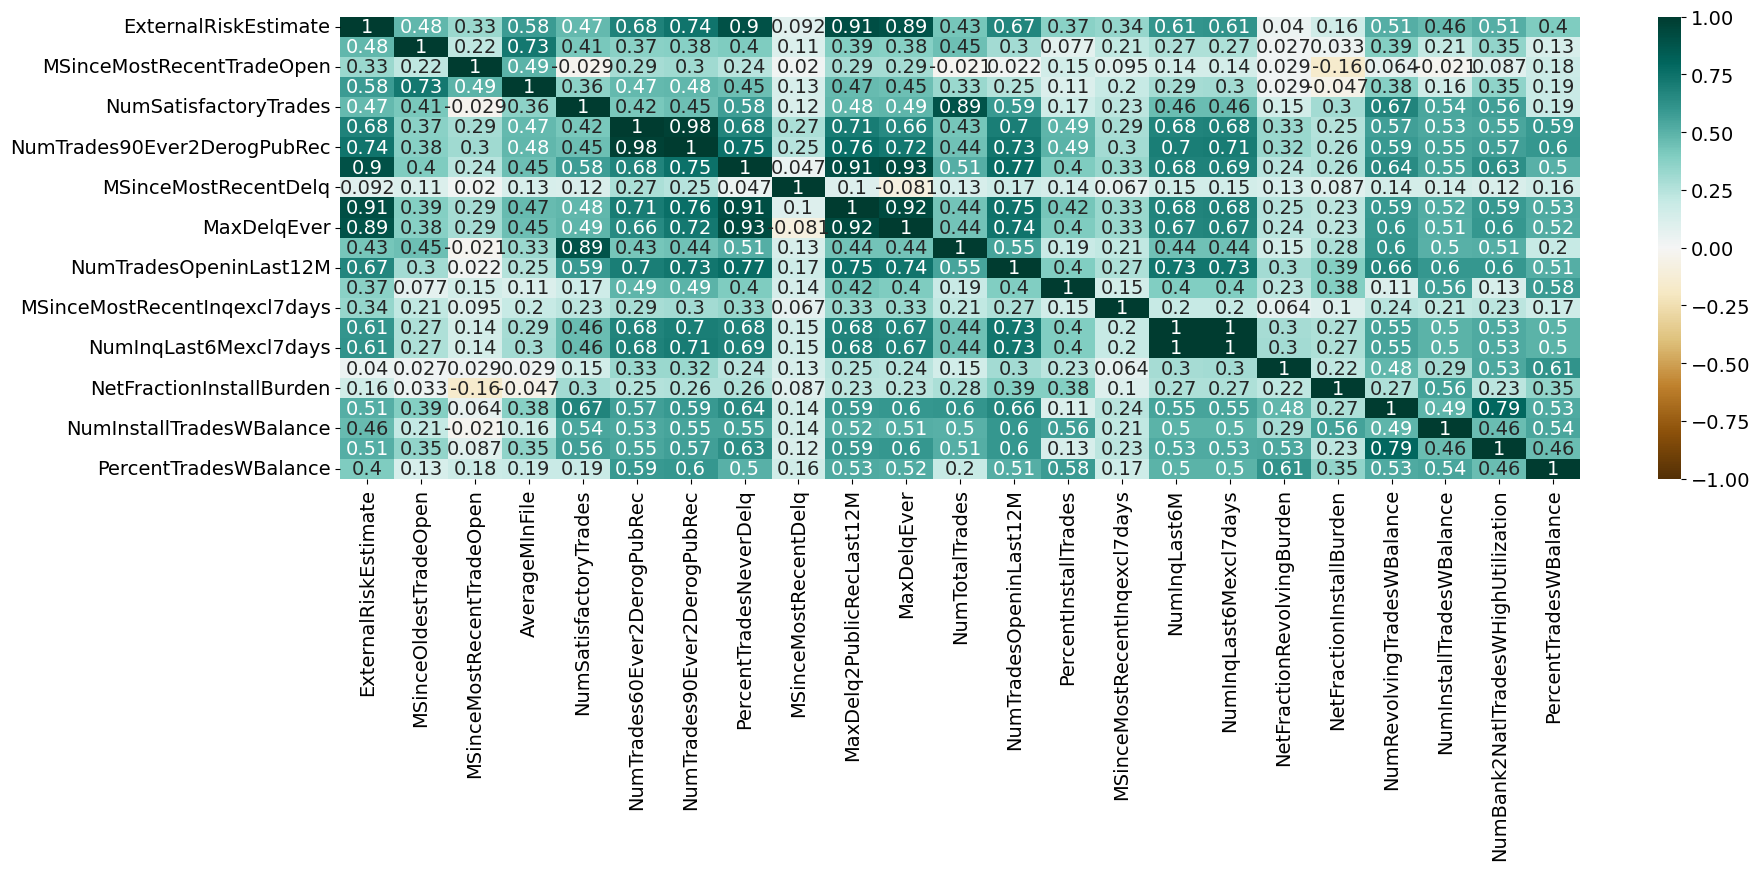

In [26]:
# heat map of correlation between features
plt.figure(figsize = (20,6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
plt.savefig('heatmap.png', dpi = 300, bbox_inches = 'tight')

In [27]:
# features with highest correlations
top_correlation = pd.DataFrame(df.corr().unstack().abs().sort_values(ascending = False).drop_duplicates())
top_correlation.loc[top_correlation[0] >= 0.5]

0
ExternalRiskEstimate        ExternalRiskEstimate                1.000000
NumInqLast6M                NumInqLast6Mexcl7days               0.996683
NumTrades60Ever2DerogPubRec NumTrades90Ever2DerogPubRec         0.975480
PercentTradesNeverDelq      MaxDelqEver                         0.928059
MaxDelq2PublicRecLast12M    MaxDelqEver                         0.924642
...                                                                  ...
NumTotalTrades              PercentTradesNeverDelq              0.512074
                            NumBank2NatlTradesWHighUtilization  0.510114
ExternalRiskEstimate        NumRevolvingTradesWBalance          0.508414
PercentTradesNeverDelq      PercentTradesWBalance               0.502780
NumTotalTrades              NumInstallTradesWBalance            0.501167

[88 rows x 1 columns]

If two variables have a correlation greater than or equal to the absolute value of 0.5, those variables are considered to be strongly correlated. From the above data frame we see that there are 88 pairs of variables which are strongly correlated with each other. We can see from the below regression plots how closely correlated some of these features are with each other. 

<AxesSubplot:xlabel='NumInqLast6M', ylabel='NumInqLast6Mexcl7days'>

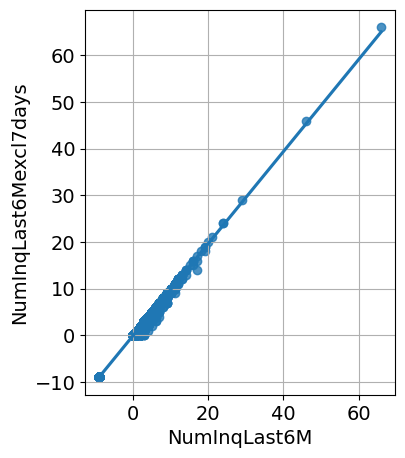

In [28]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'NumInqLast6M', y = 'NumInqLast6Mexcl7days', data = df)

In [29]:
print(my_dict['NumInqLast6M'])
print(my_dict['NumInqLast6Mexcl7days'])

number of inquiries in last 6 months
number of inquiries in last 6 months (excluding last 7 days)


<AxesSubplot:xlabel='NumTrades60Ever2DerogPubRec', ylabel='NumTrades90Ever2DerogPubRec'>

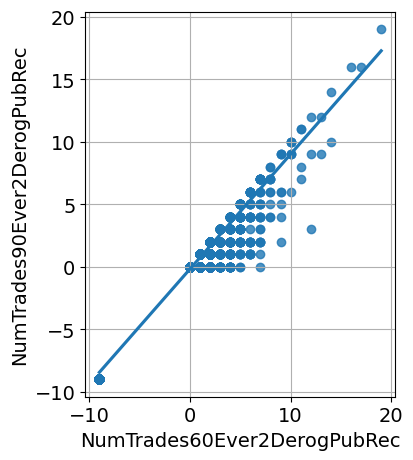

In [30]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'NumTrades60Ever2DerogPubRec', y = 'NumTrades90Ever2DerogPubRec', data = df)

In [31]:
print(my_dict['NumTrades60Ever2DerogPubRec'])
print(my_dict['NumTrades90Ever2DerogPubRec'])

number of trades which are more than 60 past due
number of trades which are more than 90 past due


<AxesSubplot:xlabel='PercentTradesNeverDelq', ylabel='MaxDelqEver'>

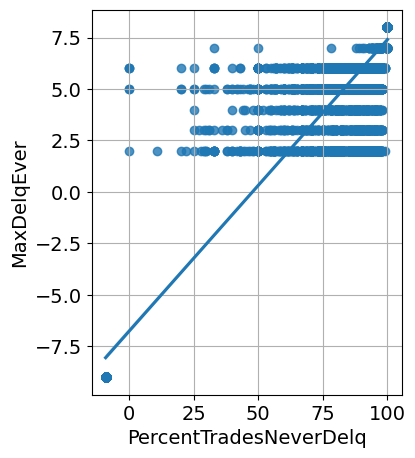

In [32]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'PercentTradesNeverDelq', y = 'MaxDelqEver', data = df)

In [33]:
print(my_dict['PercentTradesNeverDelq'])
print(my_dict['MaxDelqEver'])

percent of trades, that were not delinquent
the longest delinquency period


Printed after every regression plot are the descriptions of each feature. We see that for the highest correlated features that they are very closely related to each other. For example, the feature "NumInqLast6M" and "NumInqLast6Mexcl7days" have the descriptions "number of inquiries in last 6 months" and "number of inquiries in last 6 months (excluding last 7 days)" respectively. These two features have almost exactly the same data, and hence have almost a correlation of 1. We can also observe that the other highly correlated features are also very similarly related in their descriptions.

In [34]:
bad = df.loc[df['RiskPerformance'] == 'Bad'].drop('RiskPerformance', axis = 1)
good = df.loc[df['RiskPerformance'] == 'Good'].drop('RiskPerformance', axis = 1)


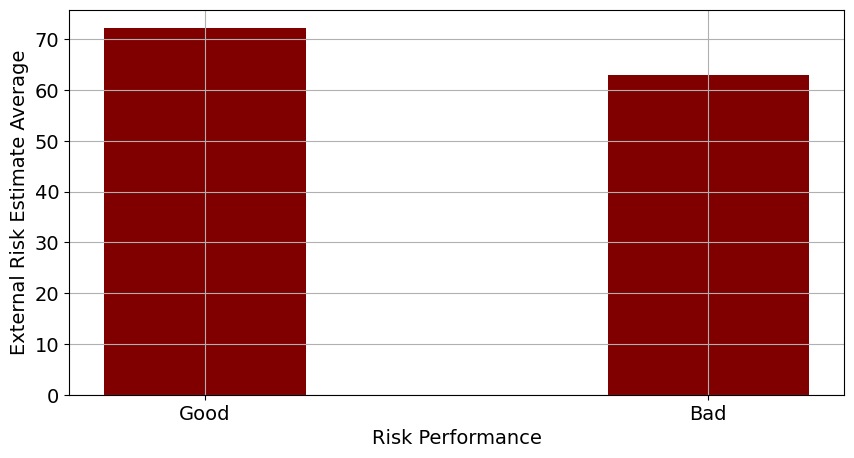

In [35]:
RiskPerformance = ['Good', 'Bad']
values = [good['ExternalRiskEstimate'].mean(), bad['ExternalRiskEstimate'].mean()]
fig = plt.figure(figsize = (10,5))
plt.bar(RiskPerformance, values, color = 'maroon', width = 0.4)
plt.xlabel("Risk Performance")
plt.ylabel("External Risk Estimate Average")
plt.show()

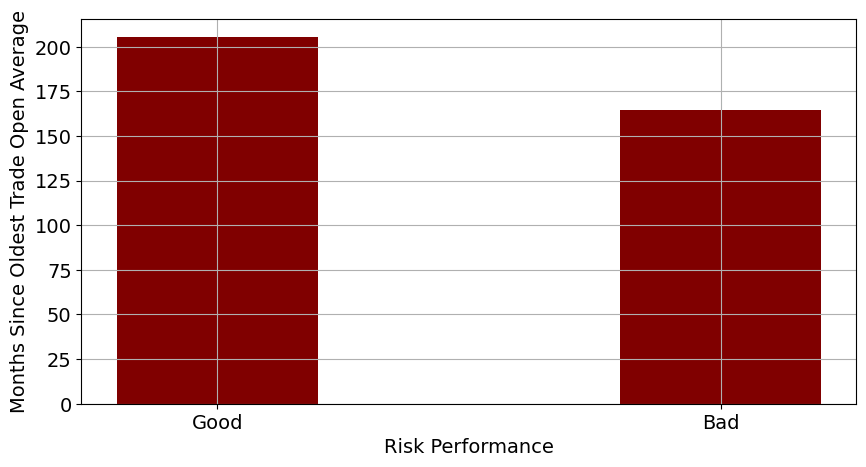

In [36]:
RiskPerformance = ['Good', 'Bad']
values = [good['MSinceOldestTradeOpen'].mean(), bad['MSinceOldestTradeOpen'].mean()]
fig = plt.figure(figsize = (10,5))
plt.bar(RiskPerformance, values, color = 'maroon', width = 0.4)
plt.xlabel("Risk Performance")
plt.ylabel("Months Since Oldest Trade Open Average")
plt.show()

From this bar plot we see that there seems to be a significant difference between the "External Risk Estimate" and "Months since oldest trade open"averages for good customers and bad customers. For every feature we can conduct an independent t-test to determine if there is a significant difference in their averages partitioned by whether the customer has a good or bad risk performance. 

In [37]:
# t-test for difference in means between good and bad risk performance
from scipy.stats import ttest_ind
values_2 = []
for i in bad.columns:
    values_2.append(ttest_ind(bad[i], good[i])[1])
key_value_pair_2 = zip(bad.columns, values_2)
p_value_dict = dict(key_value_pair_2)
for key, value in p_value_dict.items():
    print(f'The p-value for {key} is {value}.')

The p-value for ExternalRiskEstimate is 1.855490136390626e-111.
The p-value for MSinceOldestTradeOpen is 2.5840031264207896e-81.
The p-value for MSinceMostRecentTradeOpen is 1.5684489583568152e-06.
The p-value for AverageMInFile is 9.665039496270297e-104.
The p-value for NumSatisfactoryTrades is 1.373575552141484e-36.
The p-value for NumTrades60Ever2DerogPubRec is 5.9623224316202e-12.
The p-value for NumTrades90Ever2DerogPubRec is 8.986761101135063e-06.
The p-value for PercentTradesNeverDelq is 5.5732524620135854e-36.
The p-value for MSinceMostRecentDelq is 5.212255740744587e-09.
The p-value for MaxDelq2PublicRecLast12M is 1.7046081426395198e-29.
The p-value for MaxDelqEver is 4.081366054210917e-28.
The p-value for NumTotalTrades is 6.815709036181623e-21.
The p-value for NumTradesOpeninLast12M is 0.0008392299448466876.
The p-value for PercentInstallTrades is 2.589678003250963e-30.
The p-value for MSinceMostRecentInqexcl7days is 1.18897095791621e-29.
The p-value for NumInqLast6M is 1.10

In [38]:
count = 0
for key, value in p_value_dict.items():
    if value >= 0.05:
        count = count + 1
print(f'The number of features whose p-value is greater than or equal to 0.05 is {count}.')

The number of features whose p-value is greater than or equal to 0.05 is 0.


Since there are no features whose p-value is greater than or equal to 0.05, we can conclude that there is a significant difference in the means for every feature partitioned by whether the customer has a good or bad risk performance. 